In [609]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.min_rows', 20)
pd.set_option('display.max_rows', 50)

pokemoni = pd.read_csv('csv_datoteke\pokemoni.csv', index_col='id')

# Analiza pokemonov

V tej datoteki bom analizirala lastnosti Pokemonov. Podatke sem zajela iz spletne strani [Serebii](https://www.serebii.net/pokemon/nationalpokedex.shtml).

## Predstavitev pokemonov in njihove lastnosti

Pokemoni so magična bitja, podobna živalim, ki izvirajo iz enako imenovane franšize iger. Igralec si v igrah zgradi ekipo pokemonov, ki se borijo proti ostalim pokemonom. Pokemoni imajo posebne lastnosti, ki določajo, kako se borijo drug z drugim in katere strategije so najbolj uporabne glede na pokemonove vrline. Te lastnosti so:
-  __Type__: Pokemon ima lahko enega ali dva tipa, ki določa, proti katerim napadom bo pokemon bolj ali manj vzdržljiv. Prav tako določa, katere napade se pokemon lahko nauči.

-  __Abilities__: V spopadu pokemon lahko uporabi eno od svojih zmožnosti, ki pasivno vplivajo nanjo. Na primer, pokemonova zmožnost je lahko lebdenje, zaradi česar je imun na vse napade tipa "ground" oziroma "zemlja".

-  __HP oziroma "Hit points"__: Pove, koliko škode lahko pokemon vzdrži, preden izgubi spopad.

-  __Attack__: Pove, kako močni so pokemonovi fizični (torej dotikalni) napadi.

-  __Special attack__: Pove, kako močni so pokemonovi magični napadi in napadi, ki delujejo na razdaljo.

-  __Defense__: Pove, kako dobro se pokemon brani proti fizičnim napadom, oziroma koliko HP izgubi.

-  __Special defense__: Pove, kako dobro se pokemon brani proti magičnim napadom.

-  __Speed__: Spopadi med pokemoni povečini delujejo izmenično - prvo napade en pokemon, potem drugi. Hitrost določa, kateri pokemon bo prvi na vrsti - pokemon z višjo hitrostjo začne prvi.

HP, (special) attack, (special) defense in speed so numerični, type in abilities pa kategorijski. 

In [610]:
pokemoni

,pokemon,HP,attack,defense,special attack,special defense,speed
id,,,,,,,
1,Bulbasaur,45,49,49,65,65,45
2,Ivysaur,60,62,63,80,80,60
3,Venusaur,80,82,83,100,100,80
4,Charmander,39,52,43,60,50,65
5,Charmeleon,58,64,58,80,65,80
6,Charizard,78,84,78,109,85,100
7,Squirtle,44,48,65,50,64,43
8,Wartortle,59,63,80,65,80,58
9,Blastoise,79,83,100,85,105,78


## Najmočnejši pokemoni

Seveda je prvo vprašanje, ki se nam porodi, kateri pokemoni so najmočnejši, torej kateri imajo najvišji seštevek numeričnih lastnosti. To najlažje naredimo z ustvarjanjem novega stolpca, ki naj predstavlja vsoto numeričnih lastnosti:

In [611]:
pokemoni['seštevek'] = pokemoni.sum(axis=1, numeric_only=True)
pokemoni.sort_values('seštevek', ascending=False)

,pokemon,HP,attack,defense,special attack,special defense,speed,seštevek
id,,,,,,,,
493,Arceus,120,120,120,120,120,120,720
890,Eternatus,140,85,95,145,95,130,690
150,Mewtwo,106,110,90,154,90,130,680
484,Palkia,90,120,100,150,120,100,680
384,Rayquaza,105,150,90,150,90,95,680
792,Lunala,137,113,89,137,107,97,680
791,Solgaleo,137,137,107,113,89,97,680
487,Giratina,150,100,120,100,120,90,680
716,Xerneas,126,131,95,131,98,99,680


Tudi naše naslednje vprašanje je očitno: Kje v DataFramu se nahaja pikachu, maskota Pokemon franšize?

In [612]:
pokemoni.sort_values('seštevek', ascending=False).reset_index(drop=True).loc[pokemoni.sort_values('seštevek', ascending=False).reset_index(drop=True)['pokemon'] == 'Pikachu']

,pokemon,HP,attack,defense,special attack,special defense,speed,seštevek
757,Pikachu,35,55,40,50,50,90,320


Žal je pikachu komaj 757. najmočnejši pokemon.

Vrnimo se nazaj k ostalim pokemonom. Kot vidimo, nam to ne pove veliko, saj obstaja veliko pokemonov, ki imajo seštevek večji ali enak od 570. Ti pokemoni so v igrah redkejši in njihova uporaba igro naredi bistveno lažjo, zato nas niso tako zanimivi. Oglejmo si tiste, ki imajo manjši seštevek.

In [613]:
pod_570 = pokemoni[pokemoni['seštevek'] < 570]
pod_570.sort_values('seštevek', ascending=False).head(10)

,pokemon,HP,attack,defense,special attack,special defense,speed,seštevek
id,,,,,,,,
567,Archeops,75,140,65,112,65,110,567
59,Arcanine,90,110,80,100,80,95,555
671,Florges,78,65,68,112,154,75,552
901,Ursaluna,130,140,105,45,80,50,550
637,Volcarona,85,60,65,135,105,100,550
892,Urshifu,100,130,100,63,60,97,550
1000,Gholdengo,87,60,95,133,91,84,550
983,Kingambit,100,135,120,60,85,50,550
468,Togekiss,85,50,95,120,115,80,545


Ker je tako bolj zanimivo in raznoliko, bom od zdaj naprej analizirala samo pokemone s seštevkom, manjšim od 570:

In [614]:
pokemoni.drop(pokemoni[pokemoni['seštevek'] >= 570].index, inplace=True)

Kot sem napisala v predstavitvi lastnosti, imajo pokemoni dve lastnosti, ki se imenujeta special attack in attack, ki povesta, kako močni so pokemonovi fizični oziroma magični napadi. Zato je pomembno le, da ima pokemon visoko število točk pri samo enem od njih - vsi njihovi napadi so lahko ali fizični ali magični.

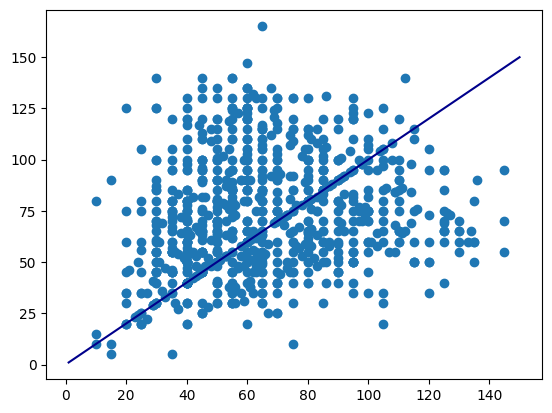

In [615]:
plt.scatter(pokemoni['special attack'], pokemoni['attack'])
x = [1 , 150]
y = x
plt.plot(x, y, color='#00008B')

Na zgornjem grafu je prikazano, da velika večina pokemonov nima enakega ali podobnega števila točk pri attack in special attack, tako da je analiza, opisana zgoraj, smiselna.
Definirala bom novi seštevek, ki bo seštel vse numerične lastnosti razen manjšega izmed attack in special attack.

In [616]:
pokemoni['novi attack'] = pokemoni[['attack','special attack']].max(axis=1)
pokemoni['novi seštevek'] = pokemoni['novi attack'] + pokemoni['defense'] + pokemoni['special defense'] + pokemoni['speed'] + pokemoni['HP']

novi = pokemoni[['pokemon', 'novi seštevek']].sort_values('novi seštevek', ascending=False).reset_index(drop=True)
stari = pokemoni[['pokemon', 'seštevek']].sort_values('seštevek', ascending=False).reset_index(drop=True)
pd.concat([novi, stari], axis = 1).head(10)

,pokemon,novi seštevek,pokemon,seštevek
0,Blissey,530,Archeops,567
1,Ursaluna,505,Arcanine,555
2,Togekiss,495,Florges,552
3,Shuckle,495,Ursaluna,550
4,Gholdengo,490,Volcarona,550
5,Kingambit,490,Urshifu,550
6,Volcarona,490,Gholdengo,550
7,Urshifu,487,Kingambit,550
8,Florges,487,Togekiss,545
9,Annihilape,485,Naganadel,540


Zgornji rezultati pokažejo, da so najmočnejši pokemoni glede na novi seštevek drugačni od najmočnejših glede na navadni seštevek. 

## Zmožnosti pokemonov
Naš naslednji korak bo dodajanje zmožnosti k obstoječemu DataFramu.

In [617]:
abilities = pd.read_csv('csv_datoteke\\abilities.csv')

pokemoni_z_abilities = pd.merge(pokemoni, abilities, right_on = 'pokemon', left_on = 'pokemon')

Oglejmo si, katere so najpogostejše.

<Axes: xlabel='ability'>

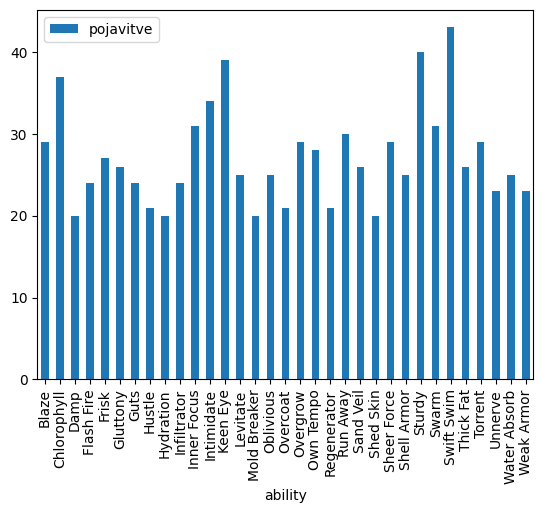

In [618]:
pokemoni_po_abilities = pokemoni_z_abilities.groupby('ability')

pogostost_abilities = pokemoni_po_abilities.size().reset_index(name ='pojavitve')

pogostost_abilities.drop(pogostost_abilities[pogostost_abilities['pojavitve'] < 20].index, inplace=True) 

pogostost_abilities.plot.bar('ability')

Ker je zmožnosti veliko, sem na grafu predstavila samo tiste, ki se pojavijo več kot 20 krat. Najpogostejša je torej swift swim, ki pokemonu podvoji hitrost, če med spopadom dežuje.

Ker je uporabnost zmožnosti subjektivna in jih je težko statistično analizirati, se jim dalje ne bom posvečala.

## Regije

Igre Pokemon se dogajajo v različnih namišljenih regijah, ki jemljemo navdih iz resničnih regij sveta. Regij je za zdaj devet, zraven so napisane tudi njihove resnične različice:
-  __Kanto__ - Kanto (regija Japonske)
-  __Johto__ - Kansai (regija Japonske)
-  __Hoenn__ - Kyushu (regija Japonske)
-  __Sinnoh__ - Hokkaido (regija Japonske)
-  __Unova__ - New York (mesto)
-  __Kalos__ - Francija
-  __Alola__ - Havaji
-  __Galar__ - Velika Britanija
-  __Paldea__ - Iberski polotok

Vsaka nova igra prinese tudi novo regijo in s tem nove pokemone, a v regijah se nahajajo tudi pokemoni, ki originalno ne izvirajo s te regije. Njihov izvor lahko ugotovimo iz njihove ID - manjša kot je ID, iz starejše igre pokemon prihaja in zato iz starejše regije. Na primer, bulbasaur (pokemon z ID = 1), prihaja iz Kanto regije, a ga lahko najdemo tudi v Kalos regiji, ki je predstavljena v novejših igrah.

Začnimo s tem, da vsakemu pokemonu dodamo lastnost, ki pove, iz katere regije prihaja.

In [619]:
def regija():
    for i in range(1, 1011): 
        if 0 < i <= 151: 
            pokemoni.loc[i, 'regija'] = 'Kanto'
        if 151 < i <= 251: 
            pokemoni.loc[i, 'regija'] = 'Johto'
        if 251 < i <= 386: 
            pokemoni.loc[i, 'regija'] = 'Hoenn'
        if 386 < i <= 493: 
            pokemoni.loc[i, 'regija'] = 'Sinnoh'
        if 493 < i <= 649: 
            pokemoni.loc[i, 'regija'] = 'Unova'
        if 649 < i <= 721: 
            pokemoni.loc[i, 'regija'] = 'Kalos'
        if 721 < i <= 809: 
            pokemoni.loc[i, 'regija'] = 'Alola'
        if 809 < i <= 905: 
            pokemoni.loc[i, 'regija'] = 'Galar'
        if 905 < i <= 1010:
            pokemoni.loc[i, 'regija'] = 'Paldea'
regija()

C:\Users\tinka\AppData\Local\Temp\ipykernel_8628\503001024.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Kanto' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  pokemoni.loc[i, 'regija'] = 'Kanto'


Oglejmo si, koliko novih pokemonov uvede vsaka regija:

<Axes: xlabel='regija'>

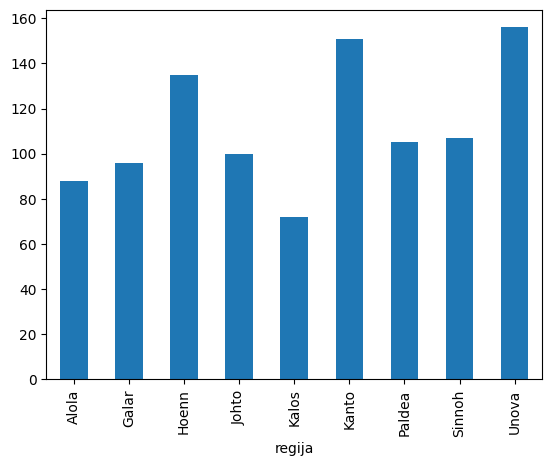

In [620]:
pokemoni_po_regijah = pokemoni.groupby('regija').size()
pokemoni_po_regijah.plot.bar()

V regijah Kanto in Unova se nahaja največ novih pokemonov. Za regijo Kanto je smiselno, saj je to regija iz prve igre - da bi svet v igrah bil zanimiv in zabaven, je moralo biti dodanih največ novih pokemonov.
Podoben razlog velja tudi za regijo Unova - v igri s to regijo so se razvijalci odločili, da bodo nastopali samo novi pokemoni (torej nobeni in starejših regij). Da bi izkušnja bila bolj potopitvena, so spet morali dodati veliko novih pokemonov.

Regija Kalos prinese najmanj pokemonov.


## Tipi pokemonov

Nazadnje si oglejmo še tipe pokemonov. Tip je pokemonova najbolj prepoznavna lastnost - ponavadi ga (ali ju) lahko prepoznamo kar z videza pokemona. Določa, proti katerim napadom po pokemon bolj ali manj odporen. 

Tipi pokemonov so podobni elementom. Primeri tipov so: steel (jekleni) tip, water (vodni) tip ali pa dark (temni) tip. 
Obstaja tudi nekaj neintuitivnih tipov, kot recimo psychic (psihični) tip - pokemoni, ki pripadajo temu tipu, imajo psihične supermoči (na primer telekineza).

Obstaja 18 tipov, pokemon lahko pripada enemu ali dvema tipoma.

In [621]:
types = pd.read_csv('csv_datoteke\\types.csv')
pokemoni_s_tipi = pd.merge(pokemoni, types, right_on = 'pokemon', left_on = 'pokemon')

pokemoni.dropna(subset=['pokemon'],how='all', inplace=True) #na začetku analize sem odstranila (pre)močne pokemone, po dodajanju regij je to treba ponoviti

Oglejmo si pogostost tipov po specifičnih regijah. Vzemimo na primer regijo Alola, ki temelji na Havajih. Lahko bi pričakovali, da bodo tamkajšnji pokemoni pogosto tipa voda ali pa ogenj (saj so otoki vulkanskega izvora). Vsekakor naj ne bi bilo veliko pokemonov tipa jeklo ali pa tipa led.

Preverimo našo hipotezo:

<Axes: xlabel='type'>

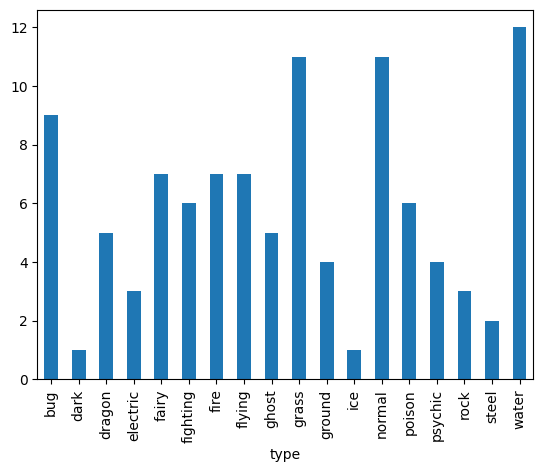

In [622]:
pokemoni_iz_Alole = pokemoni_s_tipi.drop(pokemoni_s_tipi[pokemoni_s_tipi['regija'] != 'Alola'].index)

pokemoni_iz_Alole_po_tipih = pokemoni_iz_Alole.groupby('type').size()

pokemoni_iz_Alole_po_tipih.plot.bar()

Vidimo, da je naša hipoteza delno potrjena - vodni tipi prevladujejo, jeklenih in ledenih pa skoraj ni. Pokemonov tipa ogenj je 9, kar je nad povprečjem, a ne izstopa.

## Ekipe pokemonov

Vrnimo se nazaj k najmočnejšim pokemonom. Ekipa, ki si jo igralec sestavi, lahko sestavlja največ 6 pokemonov. Za zaključek si oglejmo še najboljše ekipe pokemonov glede na regijo. 

Kriterij je sledeč:
-  Pokemoni imajo najvišji novi seštevek, kar je mogoče
-  Vsi pokemoni so različnih tipov
-  Najboljša ekipa za določeno regijo je sestavljena s pokemonov iz te regije

Ekipo sestavlja 6 pokemonov, ki najboljše ustrezajo zgornjim kriterijem

In [623]:
def elitna_ekipa(regija):
    pokemoni_regija = pokemoni_s_tipi.drop(pokemoni_s_tipi[pokemoni_s_tipi['regija'] != f'{regija}'].index)
    tipi_skupaj = pokemoni_regija.groupby('pokemon')['type'].apply(','.join).reset_index()
    sortirano =  pokemoni_regija.sort_values('novi seštevek', ascending = False).reset_index()
    videni_tipi = set()
    naj = set()
    for i, row in sortirano.iterrows():
        if len(naj) >= 6:
            return naj
        pokemon = sortirano.loc[i, 'pokemon']
        tipi = tipi_skupaj.loc[tipi_skupaj.pokemon == f'{pokemon}', 'type'].values[0].split(',')
        if pokemon in naj: 
            for tip in tipi:
                if tip not in videni_tipi:
                    videni_tipi.add(tip)
        if pokemon not in naj:
            for tip in tipi:
                if tip  not in videni_tipi:
                    videni_tipi.add(tip)
                    naj.add(pokemon)

for regija in ['Kanto', 'Johto', 'Hoenn', 'Sinnoh', 'Unova', 'Kalos', 'Alola', 'Galar', 'Paldea']:
    print(elitna_ekipa(f'{regija}'))

{'Gyarados', 'Arcanine', 'Snorlax', 'Jolteon', 'Aerodactyl', 'Alakazam'}
{'Shuckle', 'Espeon', 'Heracross', 'Blissey', 'Umbreon', 'Crobat'}
{'Sceptile', 'Swampert', 'Aggron', 'Milotic', 'Walrein', 'Gardevoir'}
{'Rhyperior', 'Togekiss', 'Magnezone', 'Weavile', 'Probopass', 'Leafeon'}
{'Cryogonal', 'Stoutland', 'Chandelure', 'Excadrill', 'Volcarona', 'Haxorus'}
{'Avalugg', 'Delphox', 'Noivern', 'Florges', 'Chesnaught', 'Tyrantrum'}
{'Incineroar', 'Primarina', 'Golisopod', 'Tsareena', 'Passimian', 'Naganadel'}
{'Sneasler', 'Orbeetle', 'Ursaluna', 'Urshifu', 'Rillaboom', 'Cinderace'}
{'Glimmora', 'Gholdengo', 'Cetitan', 'Annihilape', 'Ceruledge', 'Kingambit'}


## Zaključek

V svoji projektni nalogi sem dosegla, kar sem želela. Zavedam se, da je projektna naloga rahlo nekonvencionalna in neuporabna v resničnem življenju - vseeno upam, da je bila vsaj malo zanimiva.